In [3]:
import math;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve;

<h2>Отношение SNR</h2>

$SNR(FSPL(d, f)) = P_t + G_t + G_r - FSPL(d, f) - P_n$


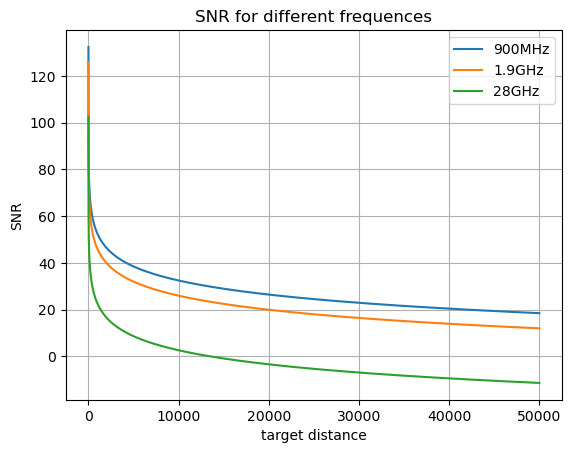

In [120]:
SPEED_OF_LIGHT = 299_792_458;
PREPARED_CONST = 20 * math.log10(4 * math.pi / SPEED_OF_LIGHT);

def FSPL(d, f):
    result = np.zeros(len(d));

    for i in range(len(d)):
        result[i] = PREPARED_CONST + 20 * math.log10(d[i] * f);

    return result;

Pt = 23;
G = 10;
B = 20e+6;
N = -174;
Pn = 10 * math.log10(B) + N;

def SNR(fspl, gain = 10, Powt = 23, Pown = 10 * math.log10(B) + N):  
    result = np.zeros(len(fspl));

    for i in range(len(fspl)):
        result[i] = Powt + gain * 2 - fspl[i];
        result[i] -= Pown;

    return result;

FREQ_1 = 900_000_000;
FREQ_2 = 1_900_000_000;
FREQ_3 = 28_000_000_000;

DISTANCE = np.linspace(0.1, 50000, 50000);

plt.plot(DISTANCE, SNR(FSPL(DISTANCE, FREQ_1)), label = "900MHz");
plt.plot(DISTANCE, SNR(FSPL(DISTANCE, FREQ_2)), label = "1.9GHz");
plt.plot(DISTANCE, SNR(FSPL(DISTANCE, FREQ_3)), label = "28GHz");
plt.xlabel("target distance");
plt.ylabel("SNR");
plt.legend();
plt.grid();
plt.title("SNR for different frequences");

Максимальная дистанция уверенного приема для 900 МГц: 41960.86 м
Максимальная дистанция уверенного приема для 1.9 ГГц: 19876.46 м
Максимальная дистанция уверенного приема для 28 ГГц: 1348.12 м


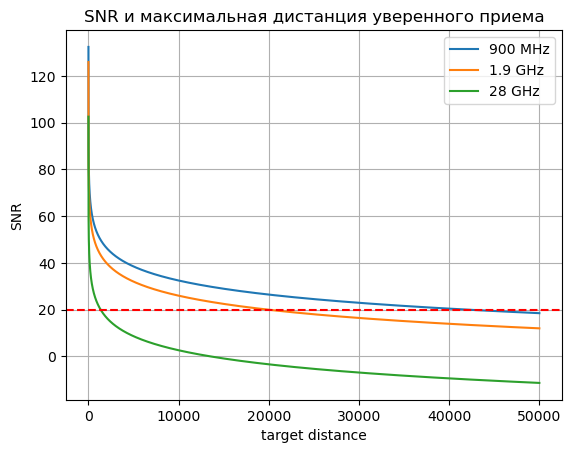

In [121]:
SNR_LIMIT = 20;

def findMaxFistance(snr_values, distances):
    for i in range(len(snr_values)):
        if snr_values[i] < SNR_THRESHOLD:
            return distances[i - 1] if i > 0 else distances[0];
    return distances[-1];

snr_900 = SNR(FSPL(DISTANCE, FREQ_1));
snr_1900 = SNR(FSPL(DISTANCE, FREQ_2));
snr_28G = SNR(FSPL(DISTANCE, FREQ_3));

max_dist_900 = find_max_distance(snr_900, DISTANCE);
max_dist_1900 = find_max_distance(snr_1900, DISTANCE);
max_dist_28G = find_max_distance(snr_28G, DISTANCE);

print(f"Максимальная дистанция уверенного приема для 900 МГц: {max_dist_900:.2f} м");
print(f"Максимальная дистанция уверенного приема для 1.9 ГГц: {max_dist_1900:.2f} м");
print(f"Максимальная дистанция уверенного приема для 28 ГГц: {max_dist_28G:.2f} м");

plt.plot(DISTANCE, snr_900, label="900 MHz");
plt.plot(DISTANCE, snr_1900, label="1.9 GHz");
plt.plot(DISTANCE, snr_28G, label="28 GHz");
plt.axhline(y=SNR_LIMIT, color='r', linestyle='--');
plt.xlabel("target distance");
plt.ylabel("SNR");
plt.legend();
plt.grid();
plt.title("SNR и максимальная дистанция уверенного приема");
plt.show();

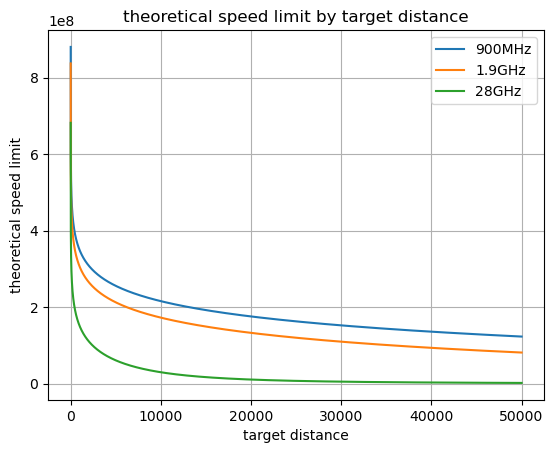

In [122]:
I = 0;

def maxSpeedLimit(fspl):
    result = np.zeros(len(fspl));
    snr = SNR(fspl);

    for i in range(len(fspl)):
        result[i] = B * math.log2(1 + 10** (snr[i] / 10));

    return result;
    
    
plt.plot(DISTANCE, maxSpeedLimit(FSPL(DISTANCE, FREQ_1)), label = "900MHz");
plt.plot(DISTANCE, maxSpeedLimit(FSPL(DISTANCE, FREQ_2)), label = "1.9GHz");
plt.plot(DISTANCE, maxSpeedLimit(FSPL(DISTANCE, FREQ_3)), label = "28GHz");
plt.xlabel("target distance");
plt.ylabel("theoretical speed limit");
plt.legend();
plt.grid();
plt.title("theoretical speed limit by target distance");

In [123]:
DISTANCE = 1000;
def parametrizedMaxSpeedLimit(frequency, gain, transmitterPower, noisePower):
    fspl = FSPL(np.array([DISTANCE]), frequency);
    snr = SNR(fspl, gain, transmitterPower, noisePower);
    return B * math.log2(1 + 10**(snr[0] / 10));

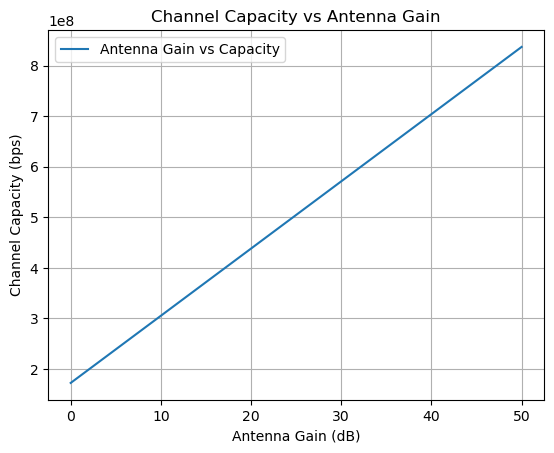

In [124]:
gains = np.linspace(0, 50, 100);
speeds_gain = [parametrizedMaxSpeedLimit(FREQ_2, g, Pt, Pn) for g in gains];

plt.plot(gains, speeds_gain, label="Antenna Gain vs Capacity");
plt.xlabel("Antenna Gain (dB)");
plt.ylabel("Channel Capacity (bps)");
plt.legend();
plt.grid();
plt.title("Channel Capacity vs Antenna Gain");
plt.show();

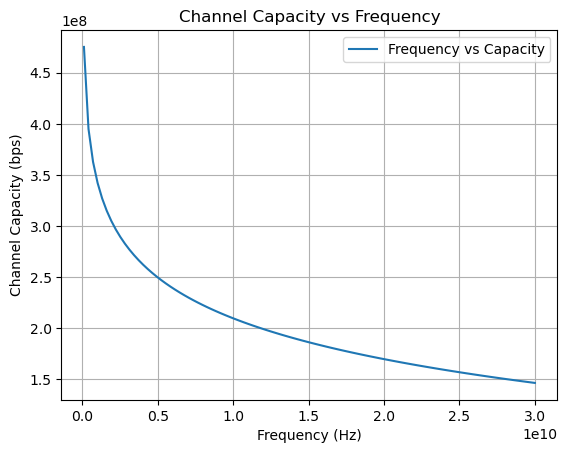

In [125]:
frequencies = np.linspace(100_000_000, 30_000_000_000, 100);
speeds_freq = [parametrizedMaxSpeedLimit(f, G, Pt, Pn) for f in frequencies];

plt.plot(frequencies, speeds_freq, label="Frequency vs Capacity");
plt.xlabel("Frequency (Hz)");
plt.ylabel("Channel Capacity (bps)");
plt.legend();
plt.grid();
plt.title("Channel Capacity vs Frequency");
plt.show();

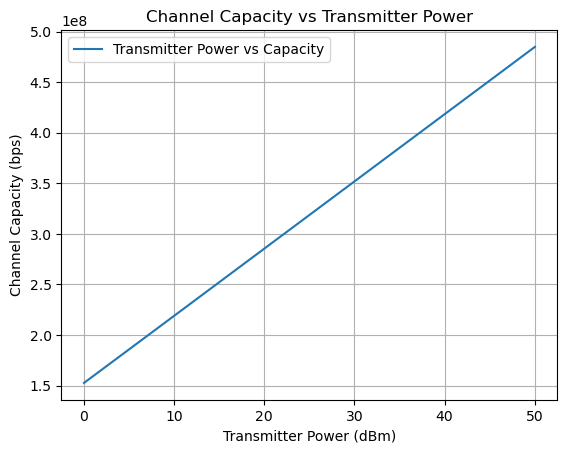

In [126]:
transmitters = np.linspace(0, 50, 100);
speeds_power = [parametrizedMaxSpeedLimit(FREQ_2, G, p, Pn) for p in transmitters];

plt.plot(transmitters, speeds_power, label="Transmitter Power vs Capacity");
plt.xlabel("Transmitter Power (dBm)");
plt.ylabel("Channel Capacity (bps)");
plt.legend();
plt.grid();
plt.title("Channel Capacity vs Transmitter Power");
plt.show();

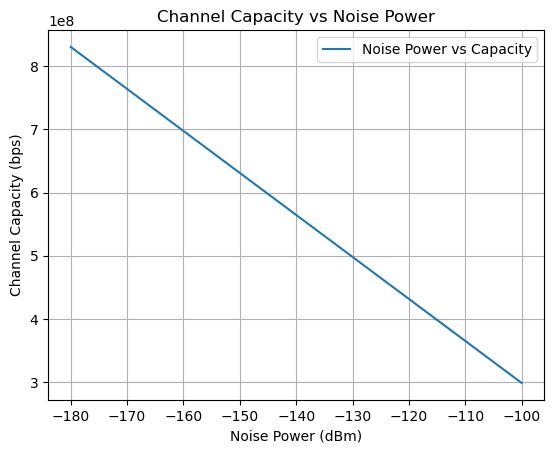

In [127]:
noises = np.linspace(-180, -100, 100);
speeds_noise = [parametrizedMaxSpeedLimit(FREQ_2, G, Pt, n) for n in noises];

plt.plot(noises, speeds_noise, label="Noise Power vs Capacity");
plt.xlabel("Noise Power (dBm)");
plt.ylabel("Channel Capacity (bps)");
plt.legend();
plt.grid();
plt.title("Channel Capacity vs Noise Power");
plt.show();

/tmp/ipykernel_10108/776588323.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = max(UMaLoS(d[i], f), 13.54 + 39.08 * math.log10(d[i]) + 20 * math.log10(f) - 0.6 * (BASE_ST_HEIGHT - 1.5));


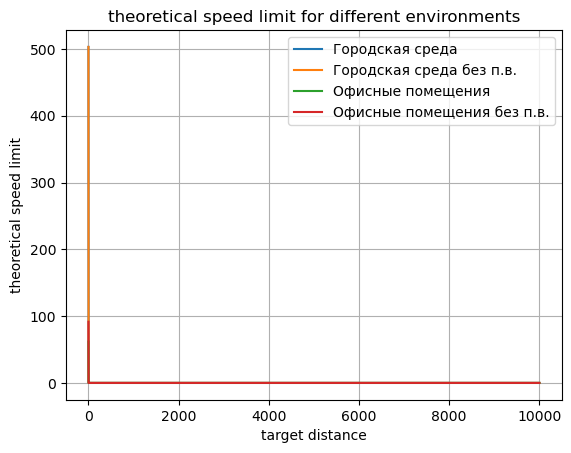

In [136]:
def UMaLoS(d, f):
    if not isinstance(d, np.ndarray):
        d = [d]
    
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 28 + 22 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

BASE_ST_HEIGHT = 25;

def UManLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = max(UMaLoS(d[i], f), 13.54 + 39.08 * math.log10(d[i]) + 20 * math.log10(f) - 0.6 * (BASE_ST_HEIGHT - 1.5));
    return result;

def InHOfficeLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 32.4 + 17.3 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

def InHOfficeNLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 38.3 + 24.9 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

DISTANCE = np.linspace(0.1, 10000, 10000);

plt.plot(DISTANCE, maxSpeedLimit(UMaLoS(DISTANCE, FREQ_2)), label = "Городская среда");
plt.plot(DISTANCE, maxSpeedLimit(UManLoS(DISTANCE, FREQ_2)), label = "Городская среда без п.в.");
plt.plot(DISTANCE, maxSpeedLimit(InHOfficeLoS(DISTANCE, FREQ_2)), label = "Офисные помещения");
plt.plot(DISTANCE, maxSpeedLimit(InHOfficeNLoS(DISTANCE, FREQ_2)), label = "Офисные помещения без п.в.");
plt.xlabel("target distance");
plt.ylabel("theoretical speed limit");
plt.legend();
plt.grid();
plt.title("theoretical speed limit for different environments");